<h1 style="font-size: 60px; font-weight: bold">Family Data Analysis</h1>
<h2>Analyst: Aerbhert John Sanchez</h2>

<h1 style="font-size: 35px; font-weight: bold;">#1. Data Preparation</h1>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from IPython.display import display, HTML
from IPython.display import display, Markdown
import warnings
warnings.filterwarnings("ignore")

In [2]:
def print(*args, sep=' ', end='\n', **kwargs):
    output = sep.join(map(str, args)) + end
    styled_output = f'<p style="font-size: 30px;">{output}</p>'
    display(HTML(styled_output))

In [3]:
Family = pd.read_csv("datasets/Family Income and Expenditure.csv")

In [4]:
Family


,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0


In [5]:
Family['Household Head Occupation'] = Family['Household Head Occupation'].fillna('unknown Household Head Occupation')
Family['Household Head Class of Worker'] = Family['Household Head Class of Worker'].fillna('unknown Household Head Class of Worker')
Family['Toilet Facilities'] = Family['Toilet Facilities'].fillna('unknown Toilet Facilities')

In [6]:
Family["Region"] = Family["Region"].astype("category")
Family["Main Source of Income"] = Family["Main Source of Income"].astype("category")
Family["Household Head Sex"] = Family["Household Head Sex"].astype("category")
Family["Household Head Age"] = Family["Household Head Age"].astype("category")
Family["Household Head Marital Status"] = Family["Household Head Marital Status"].astype("category")
Family["Household Head Highest Grade Completed"] = Family["Household Head Highest Grade Completed"].astype("category")
Family["Household Head Job or Business Indicator"] = Family["Household Head Job or Business Indicator"].astype("category")
Family["Household Head Occupation"] = Family["Household Head Occupation"].astype("category")
Family["Household Head Class of Worker"] = Family["Household Head Class of Worker"].astype("category")
Family["Type of Household"] = Family["Type of Household"].astype("category")
Family["Type of Building/House"] = Family["Type of Building/House"].astype("category")
Family["Type of Roof"] = Family["Type of Roof"].astype("category")
Family["Type of Walls"] = Family["Type of Walls"].astype("category")
Family["House Age"] = Family["House Age"].astype("category")
Family["Tenure Status"] = Family["Tenure Status"].astype("category")
Family["Toilet Facilities"] = Family["Toilet Facilities"].astype("category")
Family["Main Source of Water Supply"] = Family["Main Source of Water Supply"].astype("category")

<h1 style="font-size: 35px; font-weight: bold";>#3 Insights</h1>

<h1 style="font-size: 60px; font-weight: bold">REGIONS</h1>

<h1 style="font-size: 30px; font-weight: bold";>#1 What region has highest income?</h1>

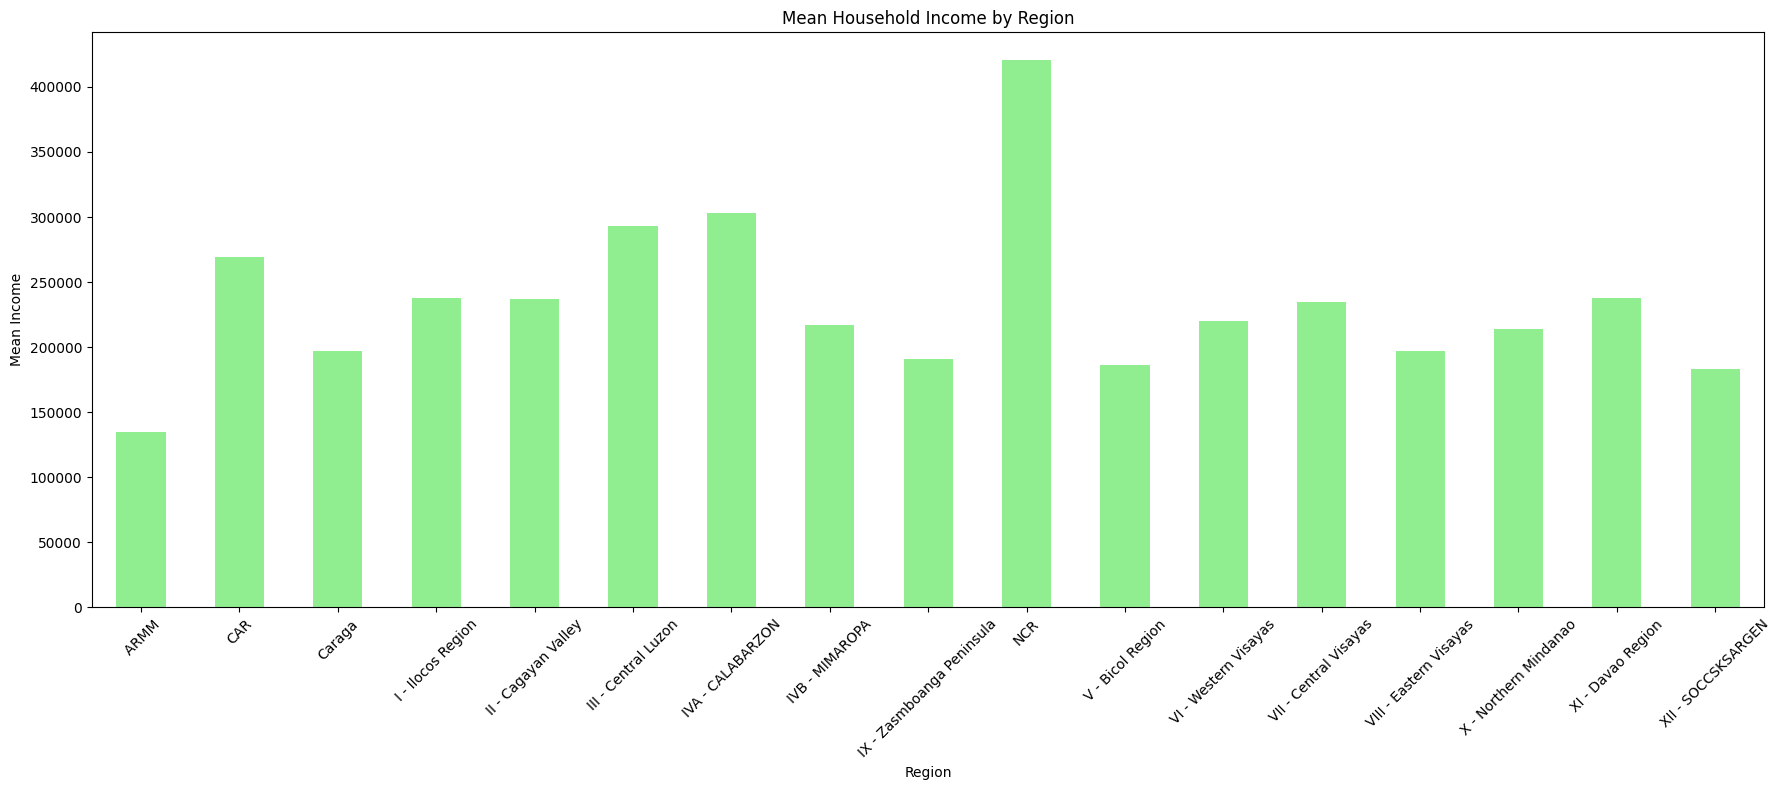

In [7]:
mean_income_region = Family.groupby('Region')['Total Household Income'].mean()

mean_income_region.plot(kind='bar', color='lightgreen', figsize=(18, 8), title='Mean Household Income by Region')
plt.xlabel('Region')
plt.ylabel('Mean Income')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
ncr_mean_income = Family[Family['Region'] == 'NCR']['Total Household Income'].mean()

In [9]:
display(Markdown(
    f'The region that highest income is NCR which is **Php {np.round(ncr_mean_income,1)}**'
))

The region that highest income is NCR which is **Php 420861.9**

<h1 style="font-size: 30px; font-weight: bold";>#2 What region has highest Food Expenditure?</h1>

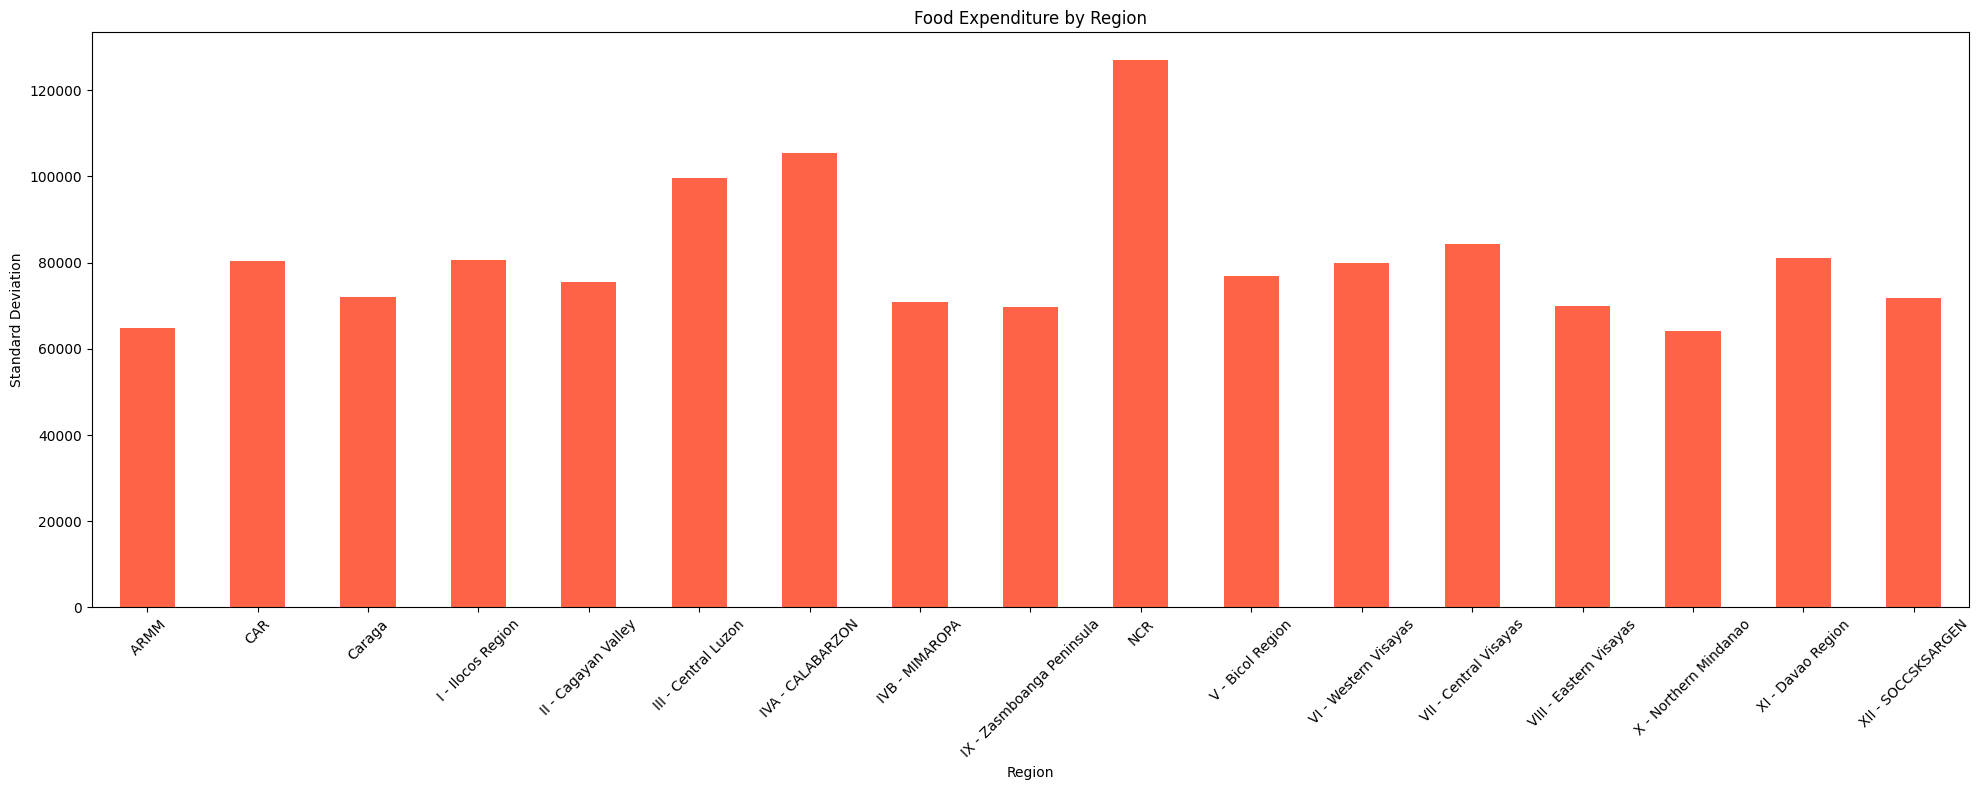

In [10]:
std_food_region = Family.groupby('Region')['Total Food Expenditure'].mean()

std_food_region.plot(kind='bar', color='tomato', figsize=(20, 8), title='Food Expenditure by Region')
plt.xlabel('Region')
plt.ylabel('Standard Deviation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
ncr_mean_food = Family[Family['Region'] == 'NCR']['Total Food Expenditure'].mean()

In [12]:
display(Markdown(
    f'The region that highest food expediture is NCR which is **Php {np.round(ncr_mean_food,1)}**'
))

The region that highest food expediture is NCR which is **Php 127080.5**

<h1 style="font-size: 30px; font-weight: bold";>#3 What region has highest Alcohol and Tabacco expenditure?</h1>

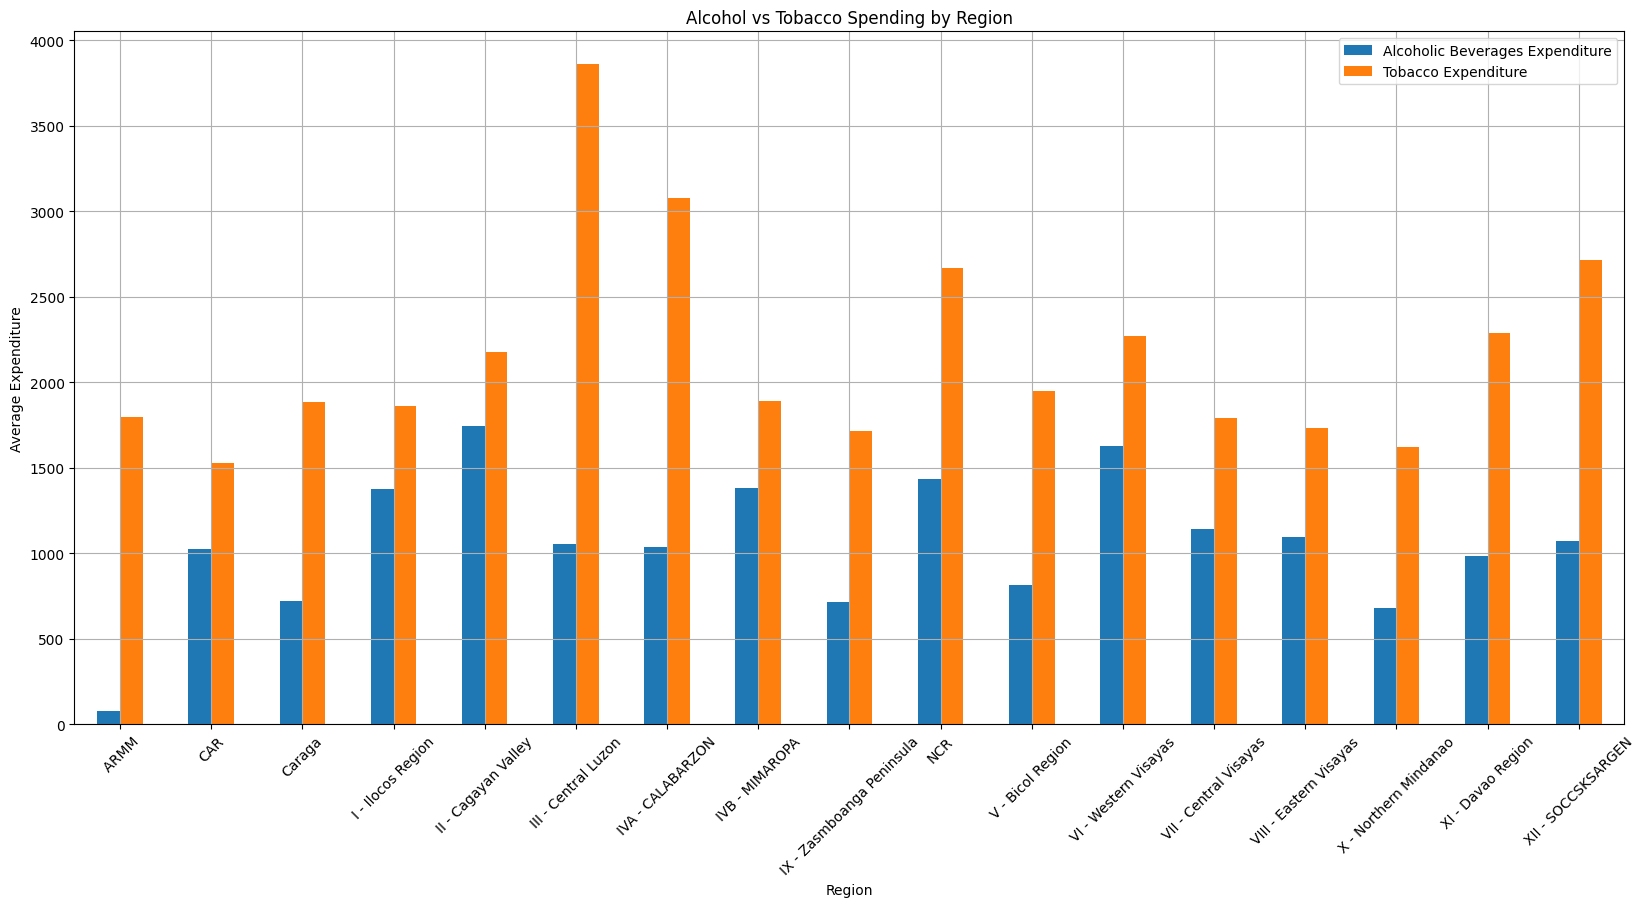

In [13]:
alcohol_tobacco_region = Family.groupby('Region')[['Alcoholic Beverages Expenditure', 'Tobacco Expenditure']].mean()

alcohol_tobacco_region.plot(kind='bar', figsize=(20, 9), title='Alcohol vs Tobacco Spending by Region')
plt.xlabel('Region')
plt.ylabel('Average Expenditure')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [14]:
display(Markdown(
    f'The region that highest alcohol expediture is Central Luzon and the region with highest tabacco expenditure is Cagayan Valley'
))

The region that highest alcohol expediture is Central Luzon and the region with highest tabacco expenditure is Cagayan Valley

<h1 style="font-size: 30px; font-weight: bold";>#4 What region has highest Medical and Education Expenditure?</h1>

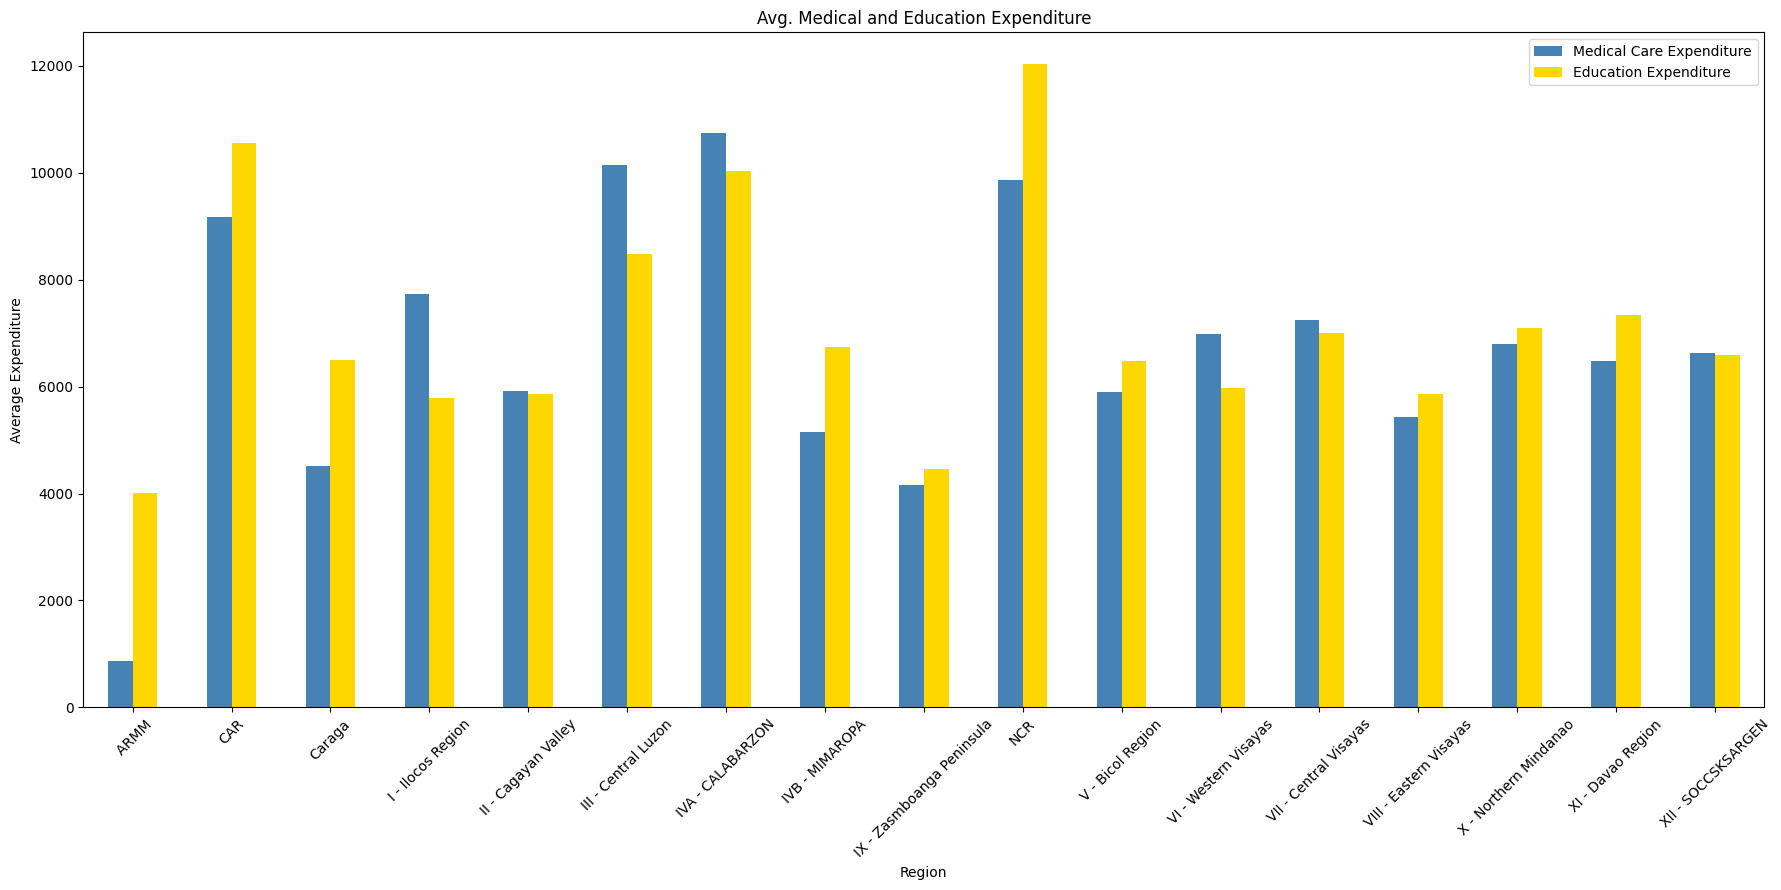

In [15]:
med_edu_region = Family.groupby('Region')[['Medical Care Expenditure', 'Education Expenditure']].mean()

med_edu_region.plot(kind='bar', color=['steelblue', 'gold'], figsize=(18, 9), title='Avg. Medical and Education Expenditure')
plt.ylabel('Average Expenditure')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
display(Markdown(
    f'The region that highest Medical expediture is Calabarzon and the region with highest education expenditure is NCR'
))

The region that highest Medical expediture is Calabarzon and the region with highest education expenditure is NCR

<h1 style="font-size: 30px; font-weight: bold";>#5 What region has highest Transportation Expenditure?</h1>

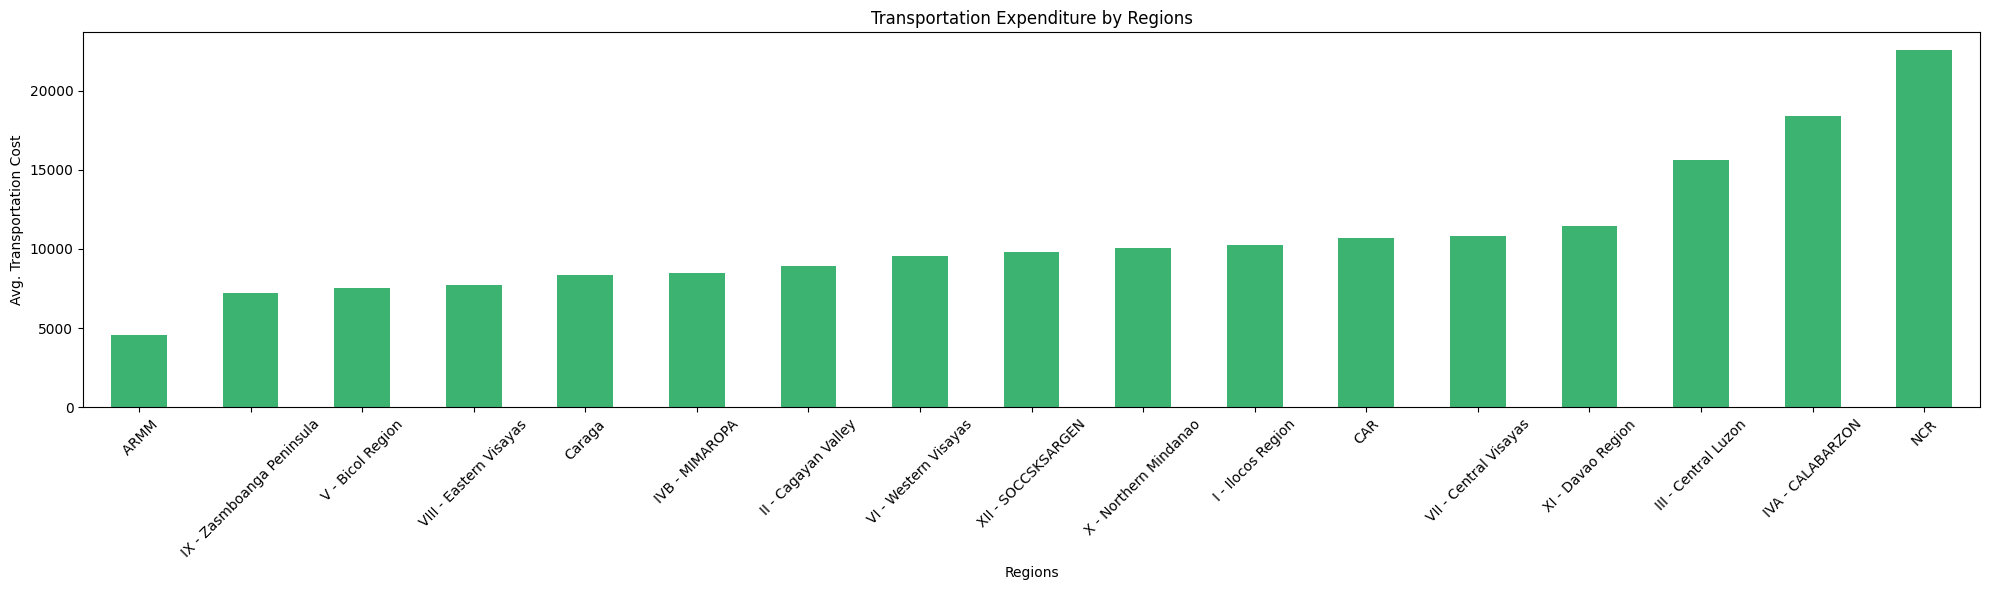

In [17]:
transport_by_type_region = Family.groupby('Region')['Transportation Expenditure'].mean().sort_values()

transport_by_type_region.plot(kind='bar', color='mediumseagreen', figsize=(20, 6), title='Transportation Expenditure by Regions')
plt.xlabel('Regions')
plt.ylabel('Avg. Transportation Cost')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [18]:
display(Markdown(
    f'The region that highest Transportation Expenditure is NCR'
))

The region that highest Transportation Expenditure is NCR

<h1 style="font-size: 30px; font-weight: bold";>#6 Is number of employed member of family affect income?</h1>

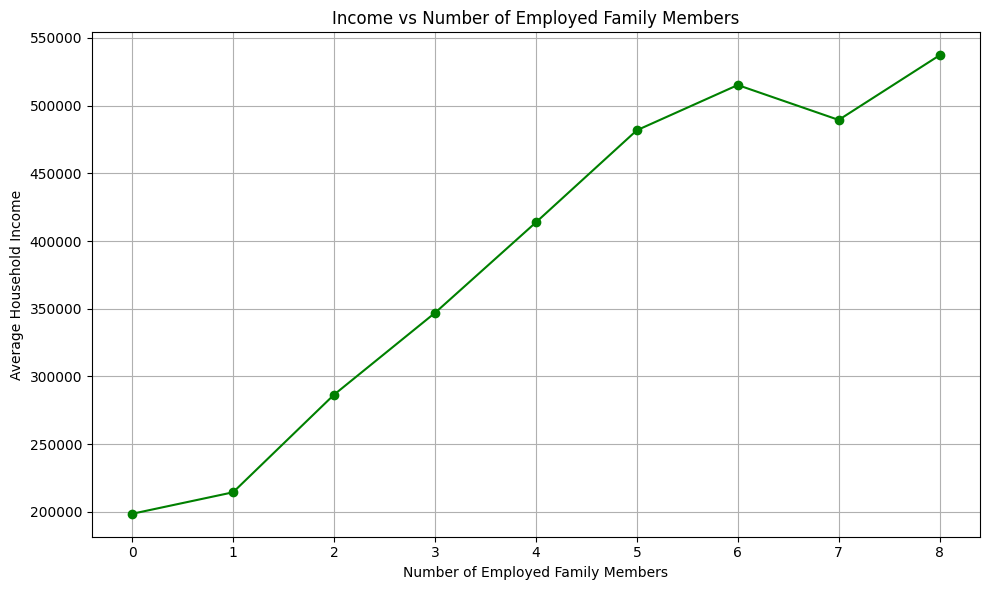

In [19]:
income_vs_employment = Family.groupby('Total number of family members employed')['Total Household Income'].mean()

income_vs_employment.plot(kind='line', marker='o', color='green', figsize=(10, 6), title='Income vs Number of Employed Family Members')
plt.xlabel('Number of Employed Family Members')
plt.ylabel('Average Household Income')
plt.grid(True)
plt.tight_layout()
plt.show()


<h1 style="font-size: 30px; font-weight: bold";>#7 Male and Female income distribution?</h1>

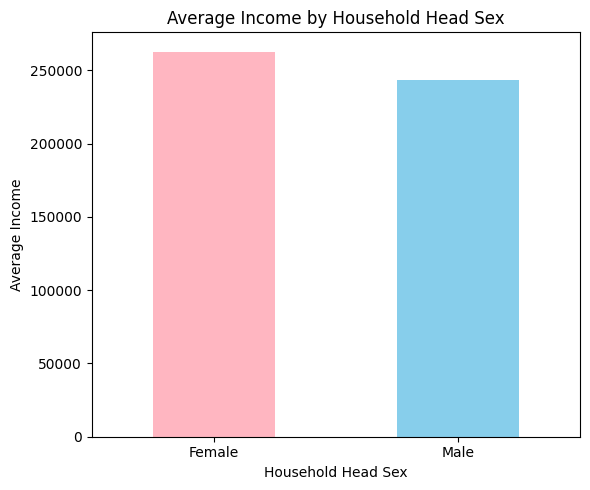

In [20]:
income_by_sex = Family.groupby('Household Head Sex')['Total Household Income'].mean()

income_by_sex.plot(kind='bar', color=[ 'lightpink','skyblue'], figsize=(6, 5), title='Average Income by Household Head Sex')
plt.ylabel('Average Income')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


<h1 style="font-size: 30px; font-weight: bold";>#8 Expenses vs Income?</h1>

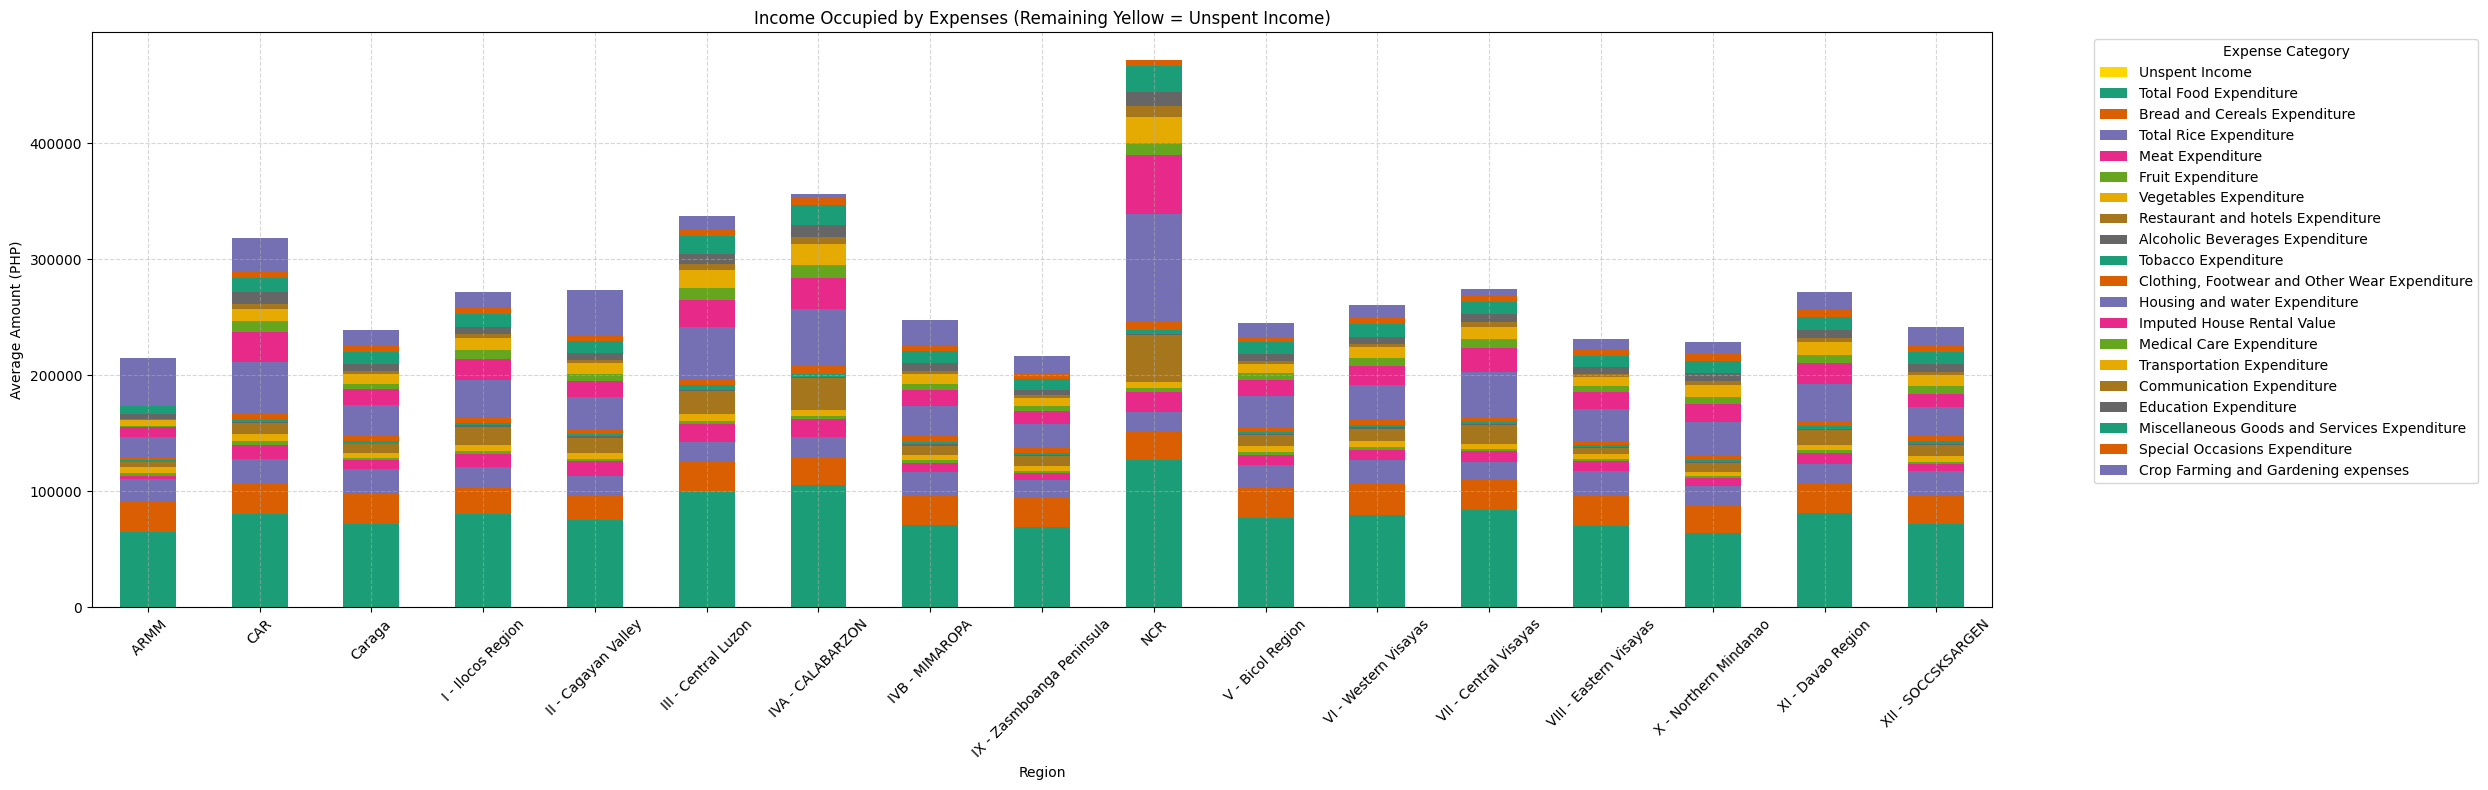

In [21]:

# --- Expense Columns ---
expense_columns = [
    'Total Food Expenditure',
    'Bread and Cereals Expenditure',
    'Total Rice Expenditure',
    'Meat Expenditure',
    'Total Fish and marine products Expenditure',
    'Fruit Expenditure',
    'Vegetables Expenditure',
    'Restaurant and hotels Expenditure',
    'Alcoholic Beverages Expenditure',
    'Tobacco Expenditure',
    'Clothing, Footwear and Other Wear Expenditure',
    'Housing and water Expenditure',
    'Imputed House Rental Value',
    'Medical Care Expenditure',
    'Transportation Expenditure',
    'Communication Expenditure',
    'Education Expenditure',
    'Miscellaneous Goods and Services Expenditure',
    'Special Occasions Expenditure',
    'Crop Farming and Gardening expenses', 
]

# --- Validate columns exist in DataFrame ---
valid_expense_columns = [col for col in expense_columns if col in Family.columns]

# --- Group by Region ---
region_income = Family.groupby('Region')['Total Household Income'].mean().to_frame(name='Income')
region_expenses = Family.groupby('Region')[valid_expense_columns].mean()

# Combine into one DataFrame
plot_data = pd.concat([region_income, region_expenses], axis=1)

# Calculate total spending per region
plot_data['Total Expenses'] = plot_data[valid_expense_columns].sum(axis=1)

# Compute unspent income, but cap at 0 (no negative values)
plot_data['Unspent Income'] = plot_data['Income'] - plot_data['Total Expenses']
plot_data['Unspent Income'] = plot_data['Unspent Income'].clip(lower=0)  # This sets negatives to 0

# Reorder columns so 'Unspent Income' comes first (so it's the base of the bar)
cols = ['Unspent Income'] + valid_expense_columns
plot_data = plot_data[cols]

# --- Plotting ---
fig, ax = plt.subplots(figsize=(20, 8))

# Define color scheme
colors = ['gold'] + sns.color_palette("Dark2", n_colors=len(valid_expense_columns))

# Plot stacked bars
plot_data.plot(kind='bar', stacked=True, ax=ax, color=colors, figsize=(25, 8), legend=False)

# Customize labels
ax.set_ylabel('Average Amount (PHP)')
ax.set_xlabel('Region')
ax.set_title('Income Occupied by Expenses (Remaining Yellow = Unspent Income)')
ax.set_xticklabels(plot_data.index, rotation=45)

# Show legend separately
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Expense Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ensure y-axis starts at zero
ax.set_ylim(bottom=0)

plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [22]:
display(Markdown("The chart shows that higher-income regions like NCR have more income yet still not enough, while lower-income regions allocate nearly all earnings to essential expenses such as food and housing."))

The chart shows that higher-income regions like NCR have more income yet still not enough, while lower-income regions allocate nearly all earnings to essential expenses such as food and housing.

<h1 style="font-size: 30px; font-weight: bold";>#9 Floor area and income</h1>

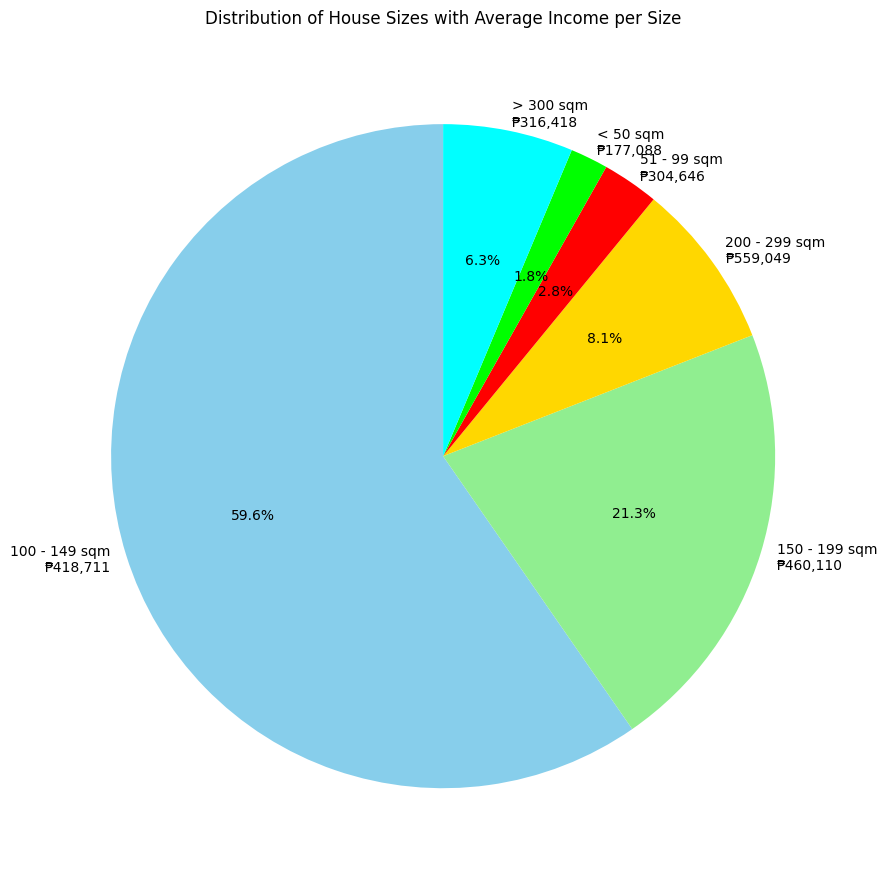

In [23]:

# --- Step 1: Define house area categories ---
def categorize_area(area):
    if area < 50:
        return '< 50 sqm'
    elif 51 <= area <= 99:
        return '51 - 99 sqm'
    elif 100 <= area <= 149:
        return '100 - 149 sqm'
    elif 150 <= area <= 199:
        return '150 - 199 sqm'
    elif 200 <= area <= 299:
        return '200 - 299 sqm'
    else:
        return '> 300 sqm'

# Apply the function
Family['House Area Category'] = Family['House Floor Area'].apply(categorize_area)

# --- Step 2: Group by category for count (for pie size) and average income ---
area_counts = Family['House Area Category'].value_counts().reindex(['< 50 sqm','51 - 99 sqm','100 - 149 sqm','150 - 199 sqm','200 - 299 sqm','> 300 sqm'])

area_income = Family.groupby('House Area Category')['Total Household Income'].mean().round(2)

# Combine counts and income for labeling
combined = pd.DataFrame({'Count': area_counts, 'Avg Income': area_income})

# Format labels: show category + avg income + percentage
labels = [f"{index}\n₱{row['Avg Income']:,.0f}" for index, row in combined.iterrows()]

# --- Step 3: Plot pie chart based on count, with income in labels ---
colors = ['skyblue', 'lightgreen', 'gold','red','lime','cyan']

plt.figure(figsize=(9, 9))
plt.pie(area_counts, labels=labels, autopct='%1.1f%%', startangle=90,
        colors=colors, textprops={'fontsize': 10}, labeldistance=1.05)

plt.title('Distribution of House Sizes with Average Income per Size')
plt.axis('equal')  # Equal aspect ratio ensures circle
plt.tight_layout()
plt.show()

<h1 style="font-size: 30px; font-weight: bold";>#10 Number of family memeber and income</h1>

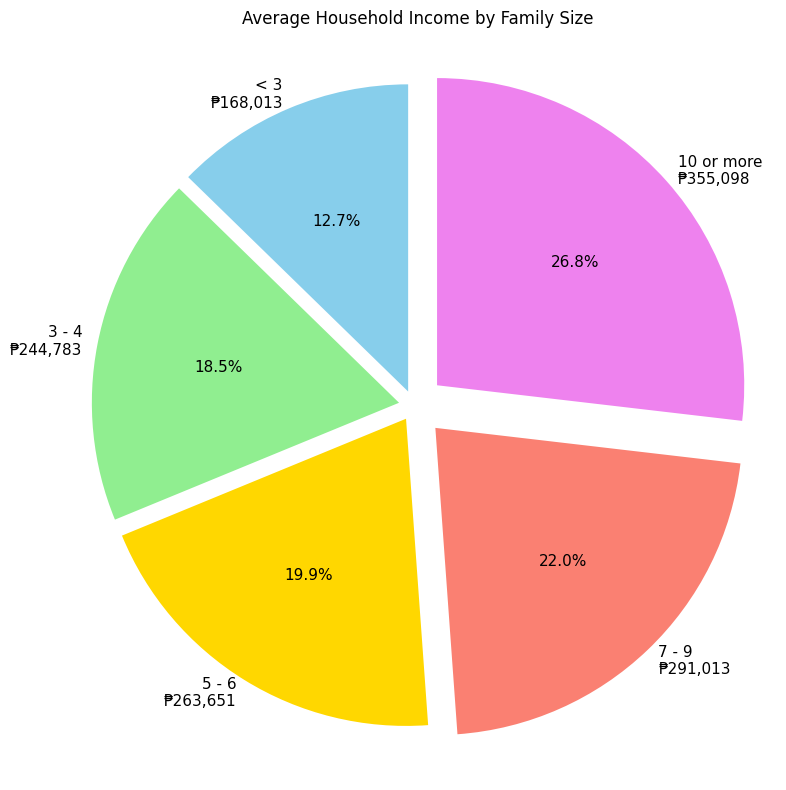

In [24]:

def categorize_family_size(size):
    if size < 3:
        return '< 3'
    elif 3 <= size <= 4:
        return '3 - 4'
    elif 5 <= size <= 6:
        return '5 - 6'
    elif 7 <= size <= 9:
        return '7 - 9'
    else:
        return '10 or more'

# Apply the function
Family['Family Size Category'] = Family['Total Number of Family members'].apply(categorize_family_size)

# --- Step 2: Group by category and calculate average income ---
avg_income_by_family_size = Family.groupby('Family Size Category')['Total Household Income'].mean().round(2)

# Reorder index to ensure correct display order
avg_income_by_family_size = avg_income_by_family_size.reindex(['< 3', '3 - 4', '5 - 6', '7 - 9', '10 or more'])

# Format labels to include both category and income
labels = [f"{cat}\n₱{income:,.0f}" for cat, income in avg_income_by_family_size.items()]

# --- Step 3: Plot pie chart ---
colors = ['skyblue', 'lightgreen', 'gold', 'salmon', 'violet']
explode = (0.05, 0.05, 0.05, 0.1, 0.1)  # Highlight larger slices

plt.figure(figsize=(8, 8))
plt.pie(avg_income_by_family_size, 
        labels=labels, 
        autopct='%1.1f%%', 
        startangle=90,
        colors=colors,
        explode=explode,
        textprops={'fontsize': 11},
        labeldistance=1.05)

plt.title('Average Household Income by Family Size')
plt.axis('equal')  # Equal aspect ratio ensures circle
plt.tight_layout()
plt.show()

<h1 style="font-size: 30px; font-weight: bold";>#11. How mannay percent did Family spend for foods? </h1>

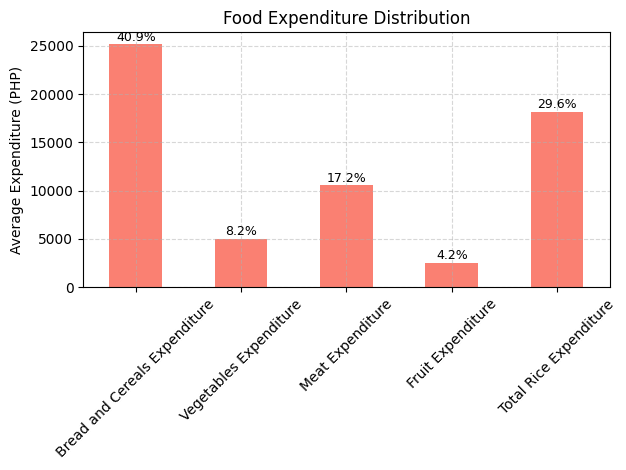

In [25]:

# Step 1: Get average spending per food category
food_spending = Family[[
    'Bread and Cereals Expenditure',
    'Vegetables Expenditure',
    'Meat Expenditure',
    'Fruit Expenditure',
    'Total Rice Expenditure'
]].mean()

# Step 2: Calculate total for percentage
total = food_spending.sum()
food_percent = (food_spending / total) * 100

# Step 3: Plot actual values on y-axis
ax = food_spending.plot(kind='bar', color='salmon', title='Food Expenditure Distribution')
plt.ylabel('Average Expenditure (PHP)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Step 4: Add percentage labels on top of bars
for i, (value, percent) in enumerate(zip(food_spending, food_percent)):
    ax.text(i, value + 50, f'{percent:.1f}%', ha='center', va='bottom', fontsize=9)

plt.show()

In [26]:
print('The data shows high expenditure inn Bread and cerials that is mostly main food.')

<h1 style="font-size: 30px; font-weight: bold";>#12. How many appliancess did a family have? </h1>

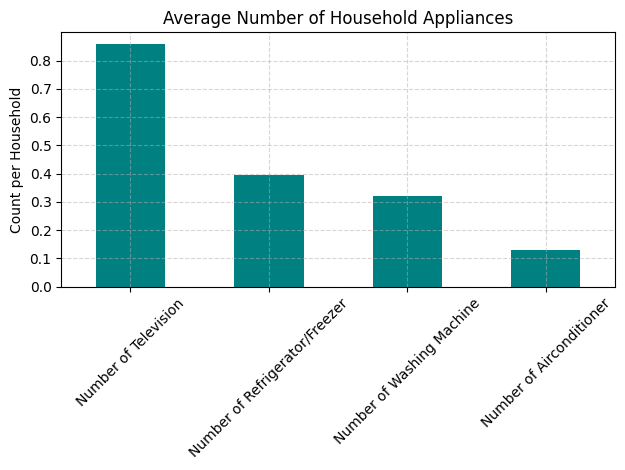

In [27]:
appliance_ownership = Family[[
    'Number of Television',
    'Number of Refrigerator/Freezer',
    'Number of Washing Machine',
    'Number of Airconditioner'
]].mean()

appliance_ownership.plot(kind='bar', color='teal', title='Average Number of Household Appliances')
plt.ylabel('Count per Household')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [28]:
print('The data shows that most family have Televisions that is mostly use for entertainment.')

<h1 style="font-size: 30px; font-weight: bold";>#13. What types of house is most common? </h1>

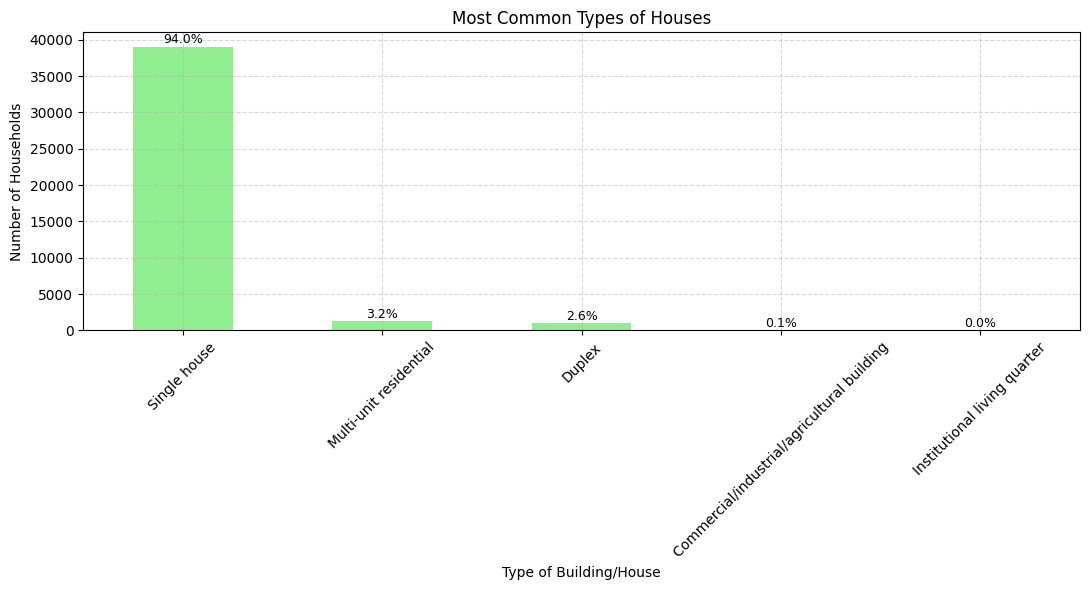

In [29]:
import matplotlib.pyplot as plt

# Step 1: Get top 5 house types
house_type = Family['Type of Building/House'].value_counts().head(5)

# Step 2: Calculate percentages
total = house_type.sum()
house_percent = (house_type / total) * 100
fig, ax = plt.subplots(figsize=(11, 6))  
# Step 3: Plot actual counts
ax = house_type.plot(kind='bar', color='lightgreen', title='Most Common Types of Houses')
plt.ylabel('Number of Households')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Step 4: Add percentage labels on top of bars
for i, (count, percent) in enumerate(zip(house_type, house_percent)):
    ax.text(i, count +10 , f'{percent:.1f}%', ha='center', va='bottom', fontsize=9)

plt.show()

In [30]:
print('The data shows that single house is most commonly build for families.')

<h1 style="font-size: 30px; font-weight: bold";>#14. What kind of roof most family household commonly use?</h1>

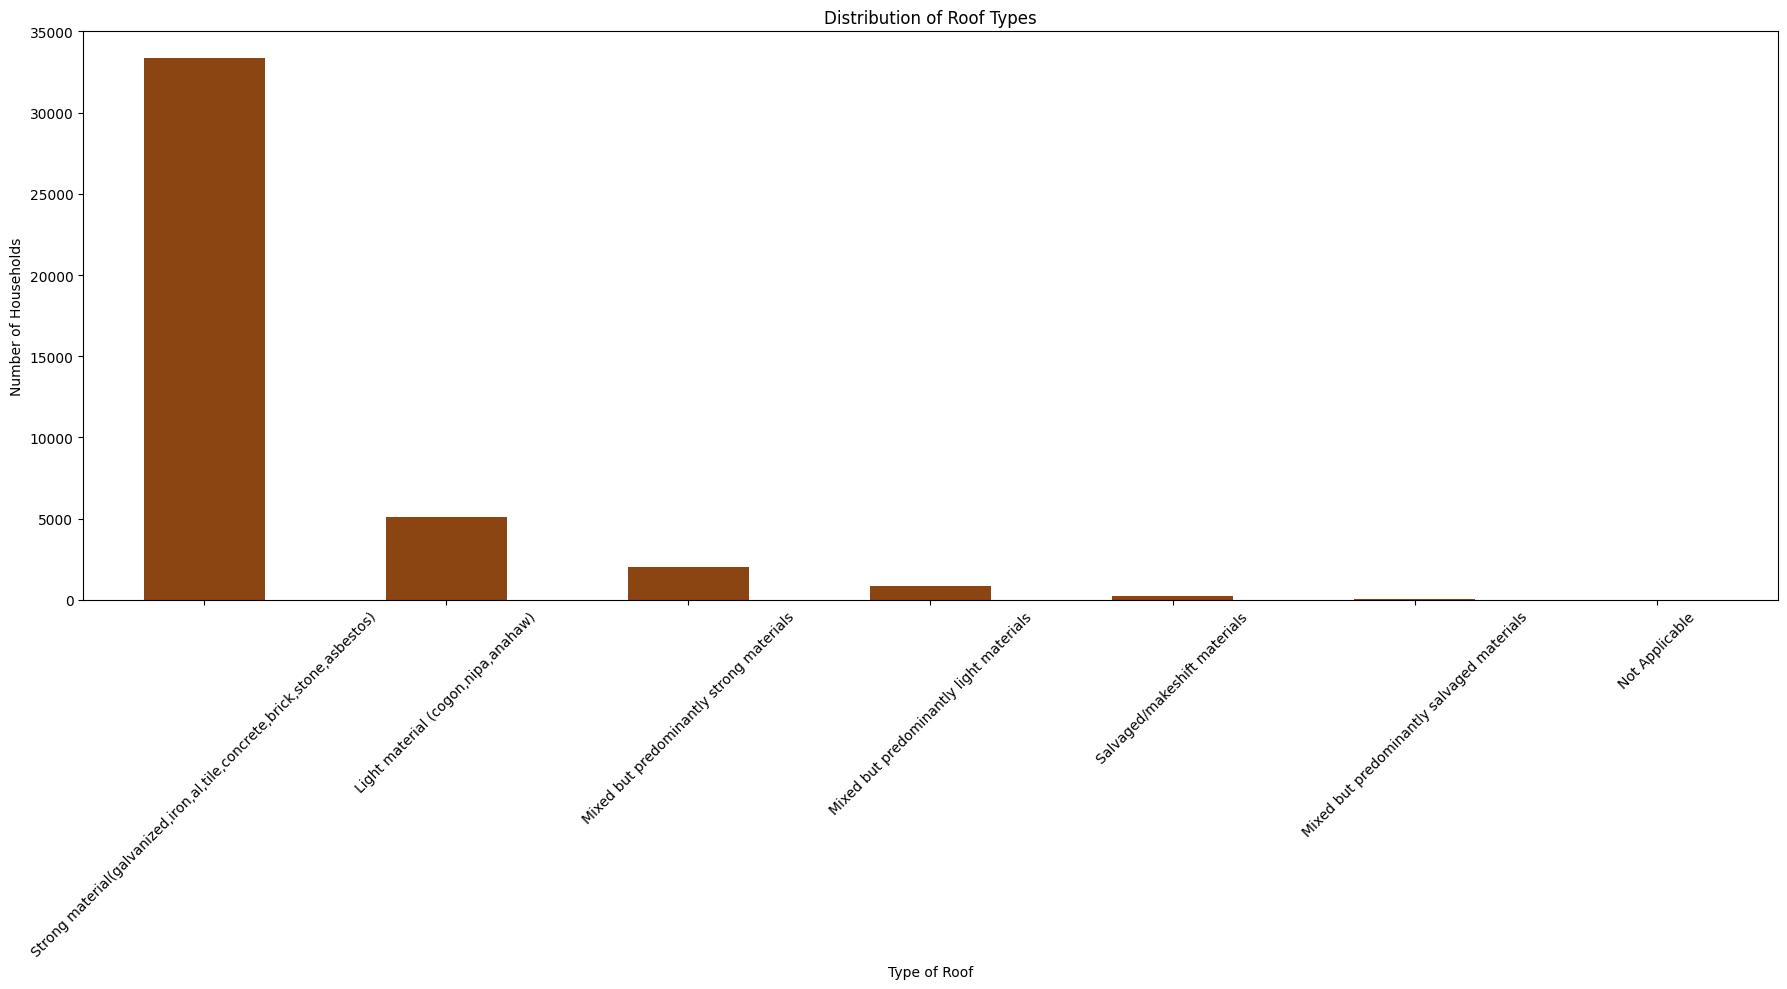

In [31]:
roof_counts = Family['Type of Roof'].value_counts()

roof_counts.plot(kind='bar', color='saddlebrown', figsize=(18, 10), title='Distribution of Roof Types')
plt.xlabel('Type of Roof')
plt.ylabel('Number of Households')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [42]:
print('The graph shows that most household use strong material for roof.')

<h1 style="font-size: 30px; font-weight: bold";>#15. What kind of wall does family use commonly? </h1>

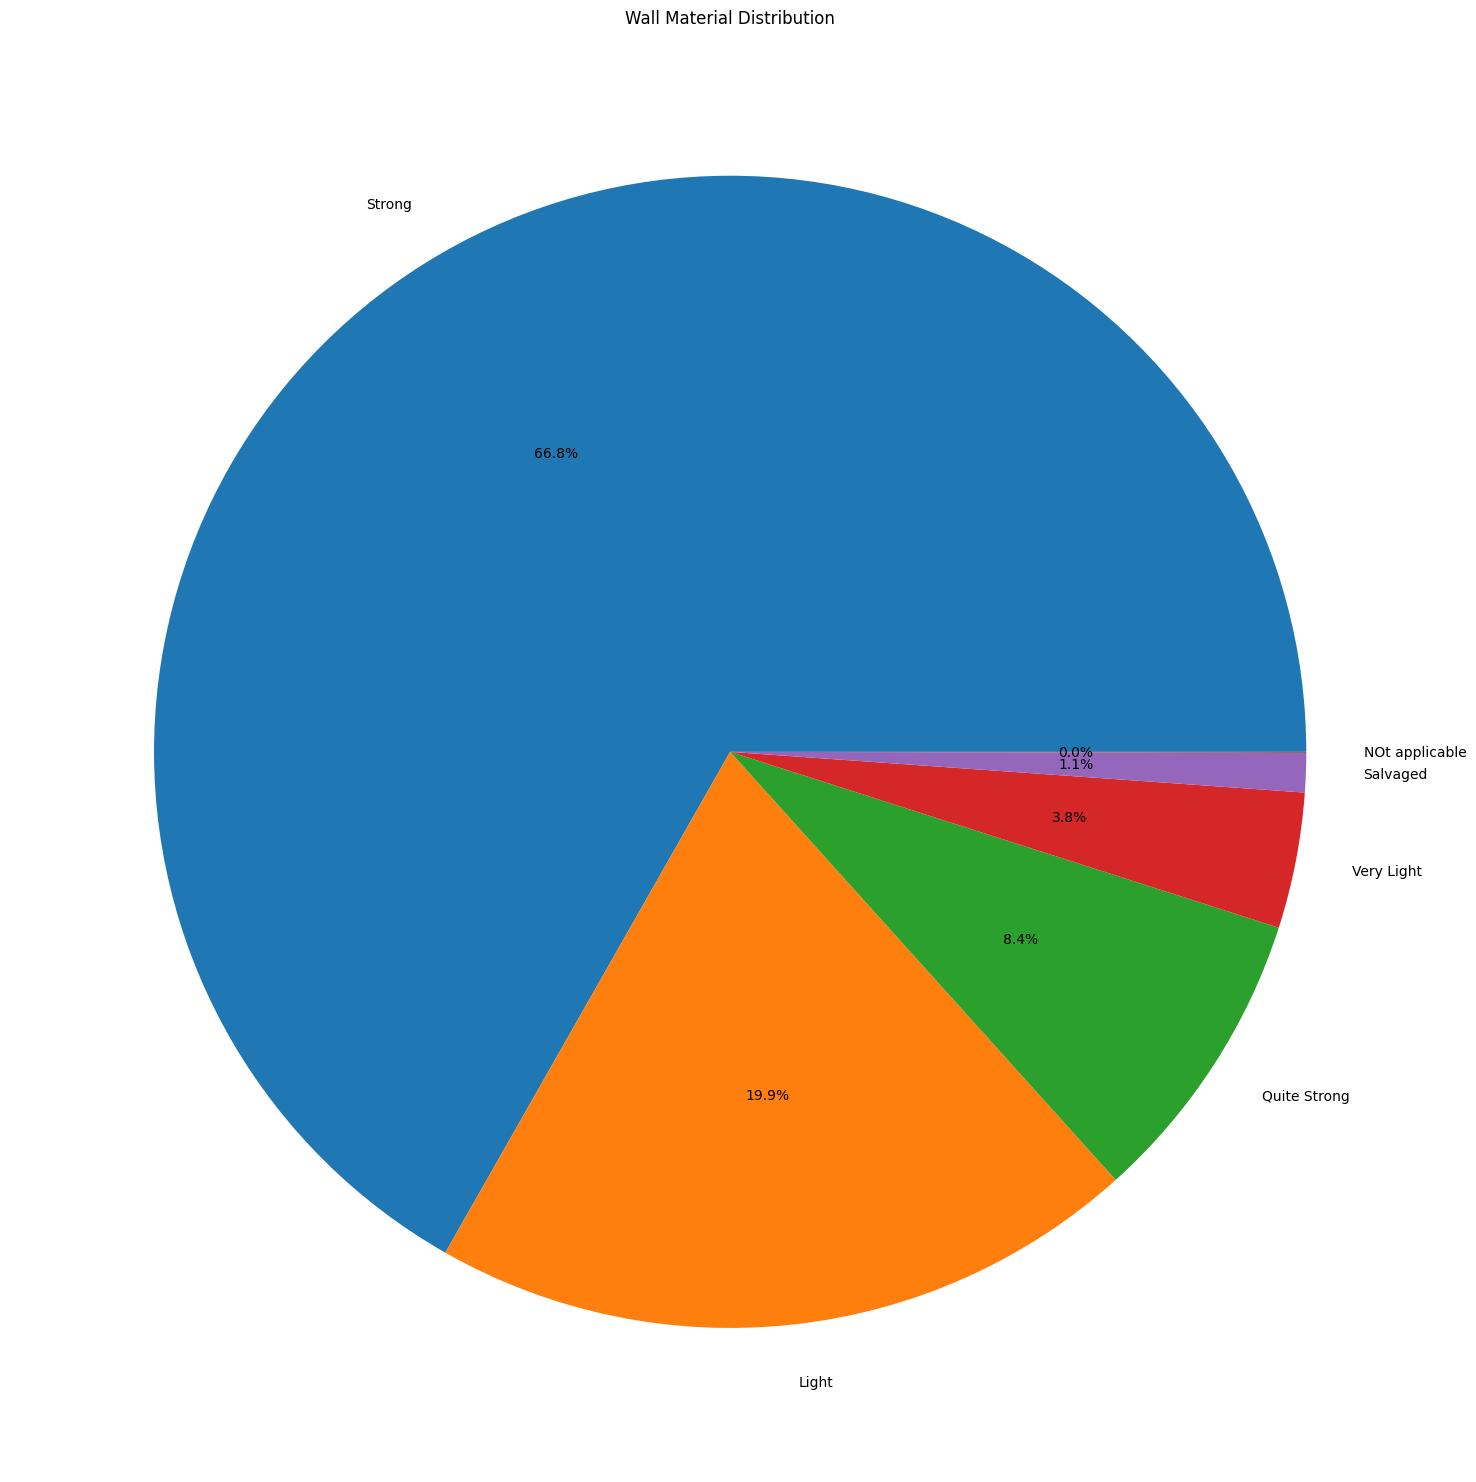

In [32]:
wall_counts = Family['Type of Walls'].value_counts()

wall_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(15, 15), title='Wall Material Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()


In [43]:
print('most family use strong wall that is more reliable and cost effective in the long run')

<h1 style="font-size: 50px; font-weight: bold";>Summary </h1>

<h1 style="font-size: 30px; font-weight: bold";>#16. What is the ratio of Income and expenditure per family size? </h1>

In [33]:
# Total expenditure
expenditure_columns = [
    'Bread and Cereals Expenditure', 'Total Rice Expenditure',
    'Meat Expenditure', 'Total Fish and  marine products Expenditure',
    'Fruit Expenditure', 'Vegetables Expenditure',
    'Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure',
    'Tobacco Expenditure', 'Clothing, Footwear and Other Wear Expenditure',
    'Housing and water Expenditure', 'Medical Care Expenditure',
    'Transportation Expenditure', 'Communication Expenditure',
    'Education Expenditure', 'Miscellaneous Goods and Services Expenditure',
    'Special Occasions Expenditure','Imputed House Rental Value'
]

Family['Total_Expenditure'] = Family[expenditure_columns].sum(axis=1)

# Income-to-expenditure ratio
Family['Income_to_Expenditure_Ratio'] = Family['Total Household Income'] / Family['Total_Expenditure']

# Asset index
asset_columns = [
    'Number of Television', 'Number of CD/VCD/DVD',
    'Number of Component/Stereo set', 'Number of Refrigerator/Freezer',
    'Number of Washing Machine', 'Number of Airconditioner',
    'Number of Car, Jeep, Van', 'Number of Personal Computer'
]
Family['Asset_Index'] = Family[asset_columns].sum(axis=1)

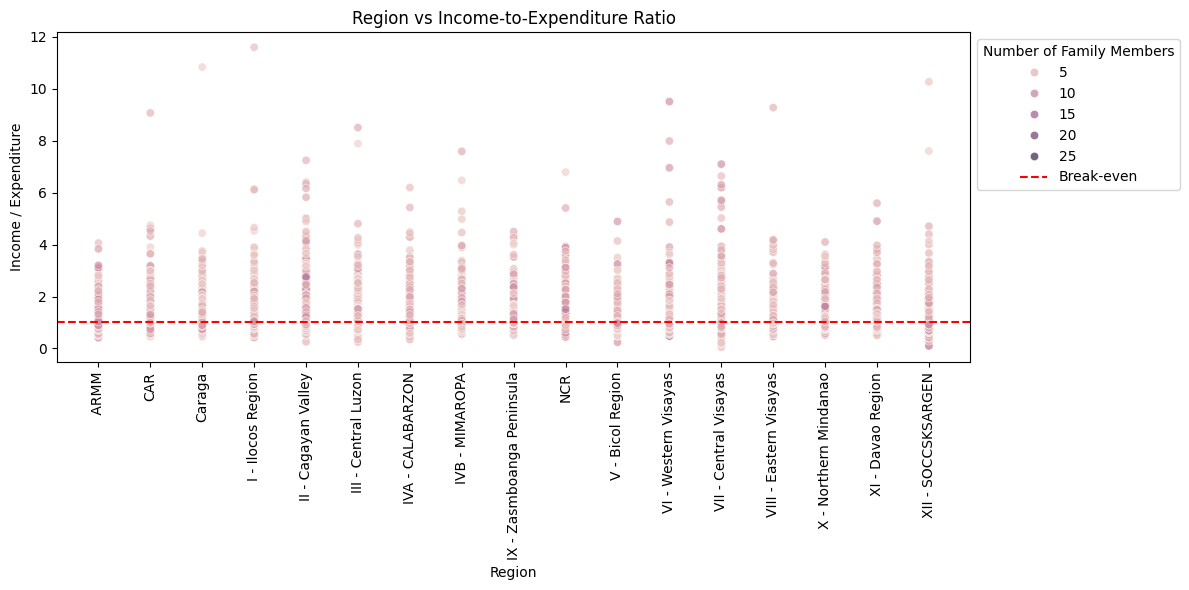

In [34]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='Region',
    y='Income_to_Expenditure_Ratio',
    hue='Total Number of Family members',
    data=Family,
    alpha=0.7
)
plt.title('Region vs Income-to-Expenditure Ratio')
plt.ylabel('Income / Expenditure')
plt.xlabel('Region')
plt.axhline(1, color='red', linestyle='--', label='Break-even')
plt.legend(title='Number of Family Members', bbox_to_anchor=(1,1), loc='upper left')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()


In [35]:
less_than_1 = (Family['Income_to_Expenditure_Ratio'] < 1).sum()
between_1_2 = ((Family['Income_to_Expenditure_Ratio'] >= 1) & (Family['Income_to_Expenditure_Ratio'] <= 2)).sum()
more_than_2 = (Family['Income_to_Expenditure_Ratio'] > 2).sum()
total_families = len(Family)


percent_less_1 = (less_than_1 / total_families) * 100
percent_1_2 = (between_1_2 / total_families) * 100
percent_more_2 = (more_than_2 / total_families) * 100


summary_md = f"""
### Household Financial Standing Summary

- **{percent_less_1:.1f}%** of families spend **more** than they earn (Ratio < 1)
- **{percent_1_2:.1f}%** of families earn **1–2** what they spend (Ratio between 1 and 2)
- **{percent_more_2:.1f}%** of families earn **more than 2×** what they spend (Ratio > 2)

This tells us that more than third of populations struggle in the country, more than half is just right and the very little portion is in better life.
"""

display(Markdown(summary_md))



### Household Financial Standing Summary

- **38.7%** of families spend **more** than they earn (Ratio < 1)
- **57.1%** of families earn **1–2** what they spend (Ratio between 1 and 2)
- **4.2%** of families earn **more than 2×** what they spend (Ratio > 2)

This tells us that more than third of populations struggle in the country, more than half is just right and the very little portion is in better life.


<h1 style="font-size: 30px; font-weight: bold";>#17.  What is the ratio of Income and expenditure per Income?</h1>

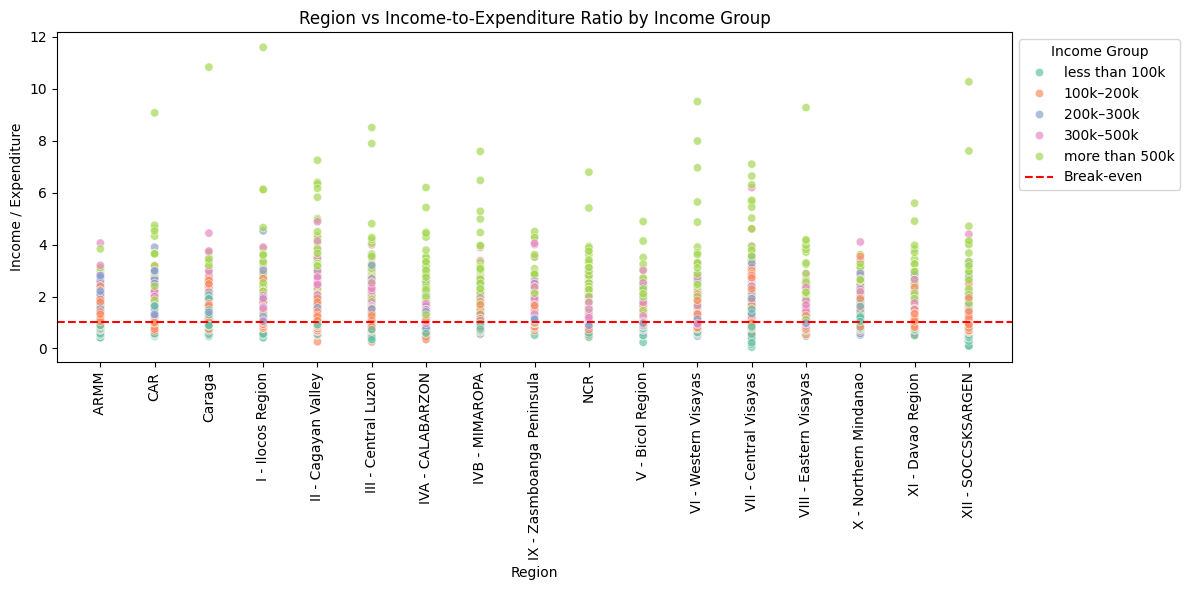

In [36]:
# Define income bins and labels
income_bins = [0, 100000, 200000, 300000, 500000, float('inf')]
income_labels = [
    'less than 100k', '100k–200k', '200k–300k',
    '300k–500k', 'more than 500k'
]

# Create a new column for income group
Family['Income_Group'] = pd.cut(
    Family['Total Household Income'],
    bins=income_bins,
    labels=income_labels,
    include_lowest=True,
     right=False 
)

# Plot: Income group as hue
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='Region',
    y='Income_to_Expenditure_Ratio',
    hue='Income_Group',
    data=Family,
    alpha=0.7,
    palette='Set2'
)
plt.title('Region vs Income-to-Expenditure Ratio by Income Group')
plt.ylabel('Income / Expenditure')
plt.xlabel('Region')
plt.axhline(1, color='red', linestyle='--', label='Break-even')
plt.legend(title='Income Group', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [37]:
income_group_counts = Family['Income_Group'].value_counts(normalize=True) * 100
markdown_text = "### Percentage of Families in Each Income Group\n"
for group, percentage in income_group_counts.items():
    markdown_text += f"- {group}: **{percentage:.2f}%**\n"

display(Markdown(markdown_text))

### Percentage of Families in Each Income Group
- 100k–200k: **37.28%**
- less than 100k: **22.56%**
- 200k–300k: **16.15%**
- 300k–500k: **13.92%**
- more than 500k: **10.08%**


<h1 style="font-size: 30px; font-weight: bold";>#18. How much is expend on food? </h1>

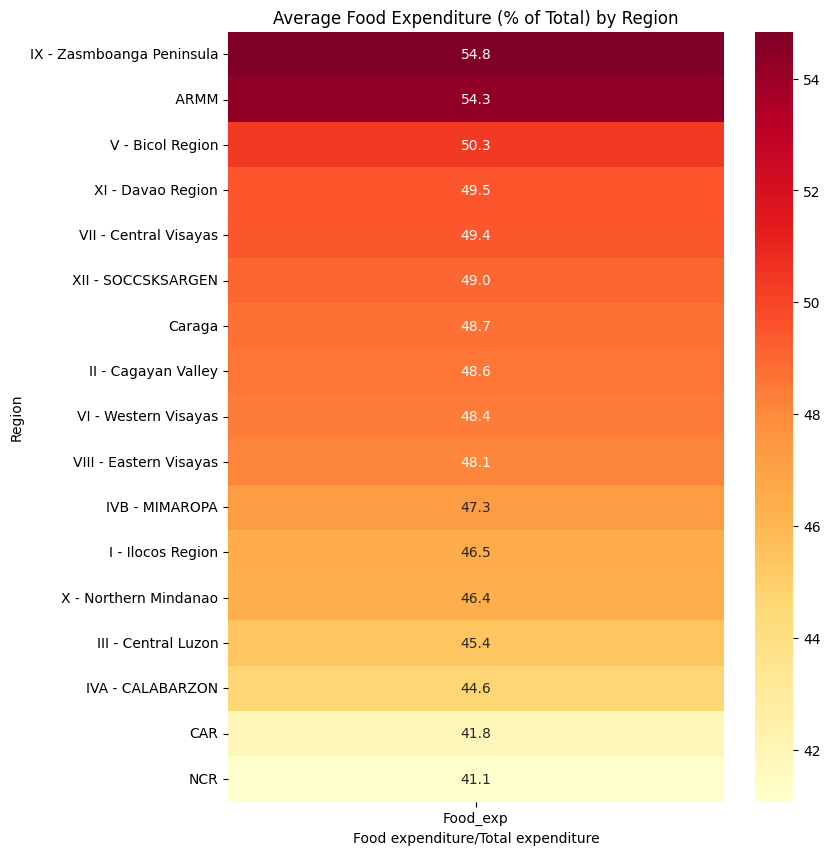

In [38]:
Family['Food_exp'] = Family['Total Food Expenditure'] / Family['Total_Expenditure'] * 100

region_food = Family.groupby('Region')['Food_exp'].mean().sort_values(ascending=False).to_frame()

plt.figure(figsize=(8, 10))
sns.heatmap(region_food, annot=True, cmap='YlOrRd', fmt='.1f')
plt.title('Average Food Expenditure (% of Total) by Region')
plt.ylabel('Region')
plt.xlabel('Food expenditure/Total expenditure')
plt.show()

<h1 style="font-size: 30px; font-weight: bold";>#19. How much do each region spend on alcohols?</h1>

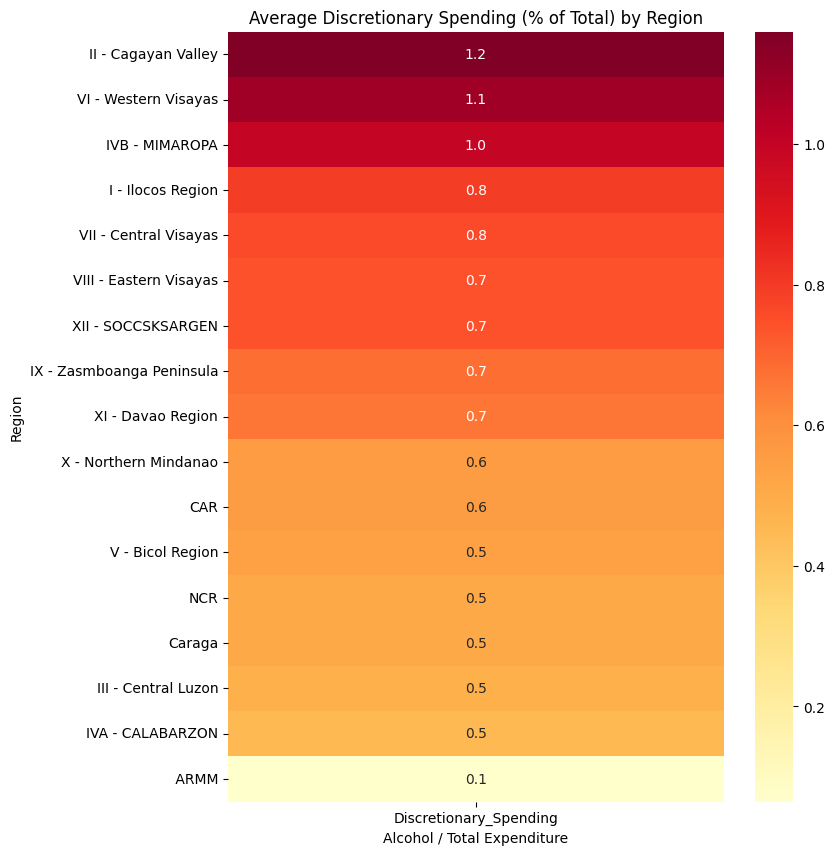

In [39]:
# Calculate % of income spent on alcohol and restaurants (as proxy for "unnecessary"/luxury spending)
Family['Discretionary_Spending'] = (
    Family['Alcoholic Beverages Expenditure']
) / Family['Total_Expenditure'] * 100

# Group by region and get average discretionary spending
region_discretionary = Family.groupby('Region')['Discretionary_Spending'].mean().sort_values(ascending=False).to_frame()

# Plot heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(region_discretionary, annot=True, cmap='YlOrRd', fmt='.1f')
plt.title('Average Discretionary Spending (% of Total) by Region')
plt.ylabel('Region')
plt.xlabel('Alcohol / Total Expenditure')
plt.show()

<h1 style="font-size: 30px; font-weight: bold";>#20. What is the poverty rate per each region?</h1>

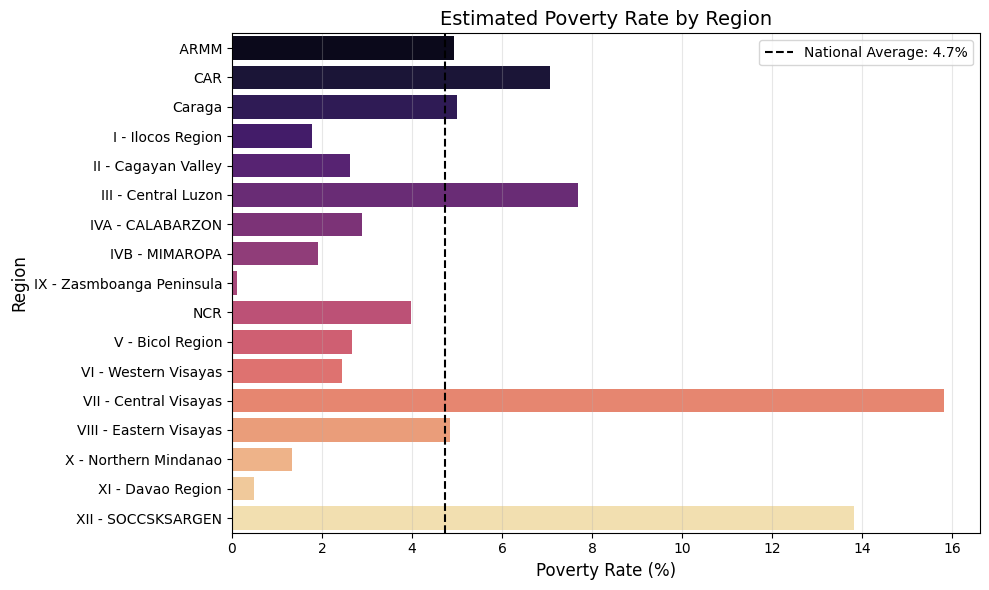

In [40]:

Family['Income_per_Capita'] = Family['Total Household Income'] / Family['Total Number of Family members']

# Define essential expenditures (basic needs)
essential_cols = [
    'Total Food Expenditure',
    'Housing and water Expenditure',
    'Medical Care Expenditure',
    'Education Expenditure',
    'Communication Expenditure'
]

Family['Essential_Expenditure'] = Family[essential_cols].sum(axis=1)

# Calculate per capita essential spending
Family['Essential_per_Capita'] = Family['Essential_Expenditure'] / Family['Total Number of Family members']

# Estimate poverty: If per-capita income < per-capita essential needs
Family['In_Poverty'] = Family['Income_per_Capita'] < Family['Essential_per_Capita']

# --- Step 2: Group by Region and calculate poverty rate ---
poverty_by_region = Family.groupby('Region').apply(
    lambda group: pd.Series({
        'Total_Households': len(group),
        'Poor_Households': group['In_Poverty'].sum(),
        'Poverty_Rate': (group['In_Poverty'].sum() / len(group)) * 100
    })
).sort_values(by='Poverty_Rate', ascending=False)

# --- Step 3: Plotting the results ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Poverty_Rate', y=poverty_by_region.index, data=poverty_by_region, palette='magma')

# Add title and axis labels
plt.title('Estimated Poverty Rate by Region', fontsize=14)
plt.xlabel('Poverty Rate (%)', fontsize=12)
plt.ylabel('Region', fontsize=12)

# Add national average line
national_avg = Family['In_Poverty'].mean() * 100
plt.axvline(national_avg, color='black', linestyle='--', label=f'National Average: {national_avg:.1f}%')
plt.legend()

# Improve layout
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()

# Show plot
plt.show()

In [44]:
print('The highest poverty rate is observed in Central Visayas, followed closely by SOCCSKSARGEN, all significantly above the national average. This indicates that families in these regions struggle the most to meet basic needs, pointing to possible issues like low income opportunities, limited access to services, or high living costs relative to income. These regions may benefit most from focused economic and social support interventions.')